In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving brca.csv to brca.csv


In [ ]:
import pandas as pd

df = pd.read_csv('brca.csv')
df.head()

,x.radius_1ean,x.texture_1ean,x.peri1eter_1ean,x.area_1ean,x.s1oothness_1ean,x.co1pactness_1ean,x.concavity_1ean,x.concave_pts_1ean,x.sy11etry_1ean,x.fractal_di1_1ean,...,x.texture_worst,x.peri1eter_worst,x.area_worst,x.s1oothness_worst,x.co1pactness_worst,x.concavity_worst,x.concave_pts_worst,x.sy11etry_worst,x.fractal_di1_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


In [ ]:
df['y'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_1ean        569 non-null    float64
 1   x.texture_1ean       569 non-null    float64
 2   x.peri1eter_1ean     569 non-null    float64
 3   x.area_1ean          569 non-null    float64
 4   x.s1oothness_1ean    569 non-null    float64
 5   x.co1pactness_1ean   569 non-null    float64
 6   x.concavity_1ean     569 non-null    float64
 7   x.concave_pts_1ean   569 non-null    float64
 8   x.sy11etry_1ean      569 non-null    float64
 9   x.fractal_di1_1ean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.peri1eter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.s1oothness_se      569 non-null    float64
 15  x.co1pactness_se     569 non-null    flo

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['y'], axis=1),
    df['y'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train.head()

,x.radius_1ean,x.texture_1ean,x.peri1eter_1ean,x.area_1ean,x.s1oothness_1ean,x.co1pactness_1ean,x.concavity_1ean,x.concave_pts_1ean,x.sy11etry_1ean,x.fractal_di1_1ean,...,x.radius_worst,x.texture_worst,x.peri1eter_worst,x.area_worst,x.s1oothness_worst,x.co1pactness_worst,x.concavity_worst,x.concave_pts_worst,x.sy11etry_worst,x.fractal_di1_worst
478,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,...,24.22,26.17,161.70,1750.0,0.1228,0.2311,0.31580,0.14450,0.2238,0.07127
303,12.65,18.17,82.69,485.6,0.10760,0.13340,0.08017,0.05074,0.1641,0.06854,...,14.38,22.15,95.29,633.7,0.1533,0.3842,0.35820,0.14070,0.3230,0.10330
155,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
186,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,0.06506,...,13.06,18.16,84.16,516.4,0.1460,0.1115,0.10870,0.07864,0.2765,0.07806
101,11.84,18.94,75.51,428.0,0.08871,0.06900,0.02669,0.01393,0.1533,0.06057,...,13.30,24.99,85.22,546.3,0.1280,0.1880,0.14710,0.06913,0.2535,0.07993


In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.33161194, 0.11484745, 0.37786272, 0.3515763 , 0.06866942,
       0.18183574, 0.33713527, 0.40805995, 0.0508635 , 0.        ,
       0.23693967, 0.        , 0.22348577, 0.34080323, 0.04894229,
       0.06536966, 0.11668286, 0.10910282, 0.0129488 , 0.01366304,
       0.44030389, 0.10606321, 0.46831456, 0.45246629, 0.12915199,
       0.23194859, 0.31042735, 0.40678465, 0.1214242 , 0.08546986])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

x.peri1eter_worst      0.468315
x.area_worst           0.452466
x.radius_worst         0.440304
x.concave_pts_1ean     0.408060
x.concave_pts_worst    0.406785
x.peri1eter_1ean       0.377863
x.area_1ean            0.351576
x.area_se              0.340803
x.concavity_1ean       0.337135
x.radius_1ean          0.331612
x.concavity_worst      0.310427
x.radius_se            0.236940
x.co1pactness_worst    0.231949
x.peri1eter_se         0.223486
x.co1pactness_1ean     0.181836
x.s1oothness_worst     0.129152
x.sy11etry_worst       0.121424
x.concavity_se         0.116683
x.texture_1ean         0.114847
x.concave_pts_se       0.109103
x.texture_worst        0.106063
x.fractal_di1_worst    0.085470
x.s1oothness_1ean      0.068669
x.co1pactness_se       0.065370
x.sy11etry_1ean        0.050864
x.s1oothness_se        0.048942
x.fractal_di1_se       0.013663
x.sy11etry_se          0.012949
x.texture_se           0.000000
x.fractal_di1_1ean     0.000000
dtype: float64

<Axes: >

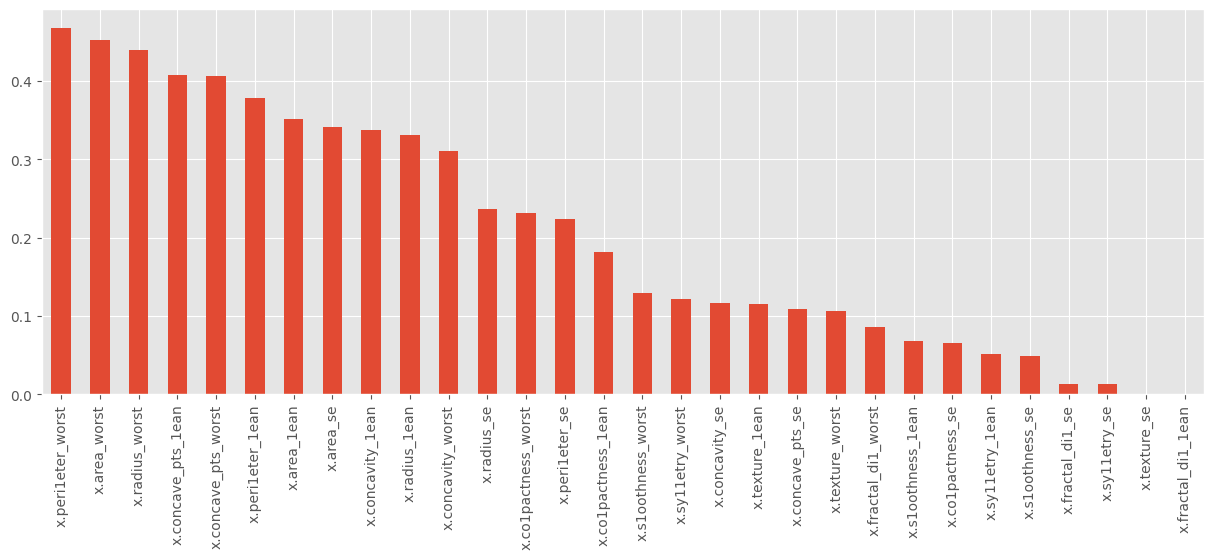

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 5))

In [ ]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['x.concave_pts_1ean', 'x.radius_worst', 'x.peri1eter_worst',
       'x.area_worst', 'x.concave_pts_worst'],
      dtype='object')

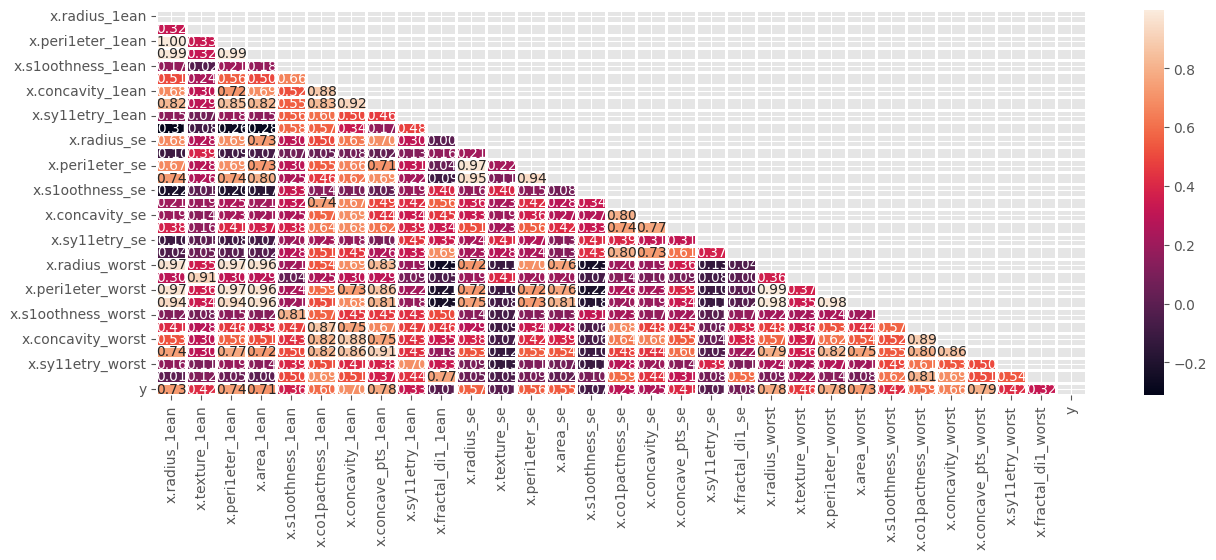

In [ ]:

plt.figure(figsize = (15, 5))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [ ]:
# removing highly correlated features

corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [ ]:
X = df.drop('y', axis = 1)
y = df['y']

# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

 #scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# model predictions

y_pred = knn.predict(X_test)
# accuracy score

print('Training Accuracy: ',accuracy_score(y_train, knn.predict(X_train))*100)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print('Testing Accuracy: ',knn_acc*100)

Training Accuracy:  96.4824120603015
Testing Accuracy:  96.49122807017544


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation = 'logistic',hidden_layer_sizes=(100,100,100), max_iter=200, alpha=1,
                     solver='sgd', verbose=10,  random_state=31, tol=0.0000000000001)
# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = mlp_classifier.predict(X_test_scaled)
y_pred = clf.predict(X_test)

# Calculate accuracy
print('Training Accuracy: ',accuracy_score(y_train, knn.predict(X_train))*100)

accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Testing Accuracy:", accuracy*100)


Iteration 1, loss = 0.88559679
Iteration 2, loss = 0.88323073
Iteration 3, loss = 0.87949975
Iteration 4, loss = 0.87577605
Iteration 5, loss = 0.87139581
Iteration 6, loss = 0.86728068
Iteration 7, loss = 0.86416432
Iteration 8, loss = 0.86124311
Iteration 9, loss = 0.85903735
Iteration 10, loss = 0.85666403
Iteration 11, loss = 0.85514345
Iteration 12, loss = 0.85429830
Iteration 13, loss = 0.85304552
Iteration 14, loss = 0.85293621
Iteration 15, loss = 0.85236805
Iteration 16, loss = 0.85213539
Iteration 17, loss = 0.85201096
Iteration 18, loss = 0.85198903
Iteration 19, loss = 0.85198011
Iteration 20, loss = 0.85197274
Iteration 21, loss = 0.85196495
Iteration 22, loss = 0.85195423
Iteration 23, loss = 0.85194578
Iteration 24, loss = 0.85191546
Iteration 25, loss = 0.85187251
Iteration 26, loss = 0.85182702
Iteration 27, loss = 0.85178056
Iteration 28, loss = 0.85173701
Iteration 29, loss = 0.85170840
Iteration 30, loss = 0.85161248
Iteration 31, loss = 0.85155128
Iteration 32, los